# CLIMATE CONNECT

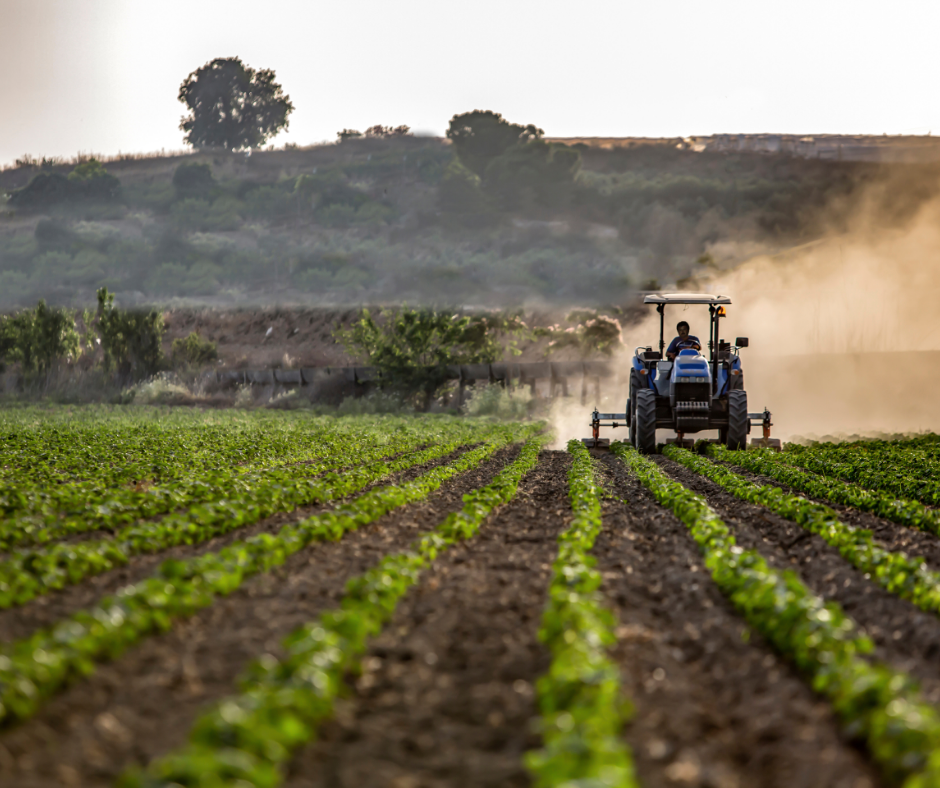

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
    * [1.2 Objectives](#section_1_2)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Train-test splits](#chapter6)
* <b>[7. Conclusion](#chapter7)</b>
* <b>[8. References](#chapter8)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

The goal is to understand the impact of agricultural activities on climate change and develop strategies for sustainable practices. Using data from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC), we will identify emission sources, predict temperature variations, and provide actionable insights. By the project's end, we will also offer valuable recommendations to promote sustainability within the agri-food sector

### Data Dictionary

- **Savanna fires:** Emissions from fires in savanna ecosystems.
- **Forest fires:** Emissions from fires in forested areas.
- **Crop Residues:** Emissions from burning or decomposing leftover plant material after crop harvesting.
- **Rice Cultivation:** Emissions from methane released during rice cultivation.
- **Drained organic soils (CO2):** Emissions from carbon dioxide released when draining organic soils.
- **Pesticides Manufacturing:** Emissions from the production of pesticides.
- **Food Transport:** Emissions from transporting food products.
- **Forestland:** Land covered by forests.
- **Net Forest conversion:** Change in forest area due to deforestation and afforestation.
- **Food Household Consumption:** Emissions from food consumption at the household level.
- **Food Retail:** Emissions from the operation of retail establishments selling food.
- **On-farm Electricity Use:** Electricity consumption on farms.
- **Food Packaging:** Emissions from the production and disposal of food packaging materials.
- **Agrifood Systems Waste Disposal:** Emissions from waste disposal in the agrifood system.
- **Food Processing:** Emissions from processing food products.
- **Fertilizers Manufacturing:** Emissions from the production of fertilizers.
- **IPPU:** Emissions from industrial processes and product use.
- **Manure applied to Soils:** Emissions from applying animal manure to agricultural soils.
- **Manure left on Pasture:** Emissions from animal manure on pasture or grazing land.
- **Manure Management:** Emissions from managing and treating animal manure.
- **Fires in organic soils:** Emissions from fires in organic soils.
- **Fires in humid tropical forests:** Emissions from fires in humid tropical forests.
- **On-farm energy use:** Energy consumption on farms.
- **Rural population:** Number of people living in rural areas.
- **Urban population:** Number of people living in urban areas.
- **Total Population - Male:** Total number of male individuals in the population.
- **Total Population - Female:** Total number of female individuals in the population.
- **total_emission:** Total greenhouse gas emissions from various sources.
- **Average Temperature °C:** The average increasing of temperature (by year) in degrees Celsius,

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

* Analyze and understand the sources of CO2 emissions in the agri-food sector.
* Develop a predictive model using regression analysis to forecast temperature variations based on various emission sources.
* Identify the most significant contributors to CO2 emissions and develop strategies for reducing these emissions.
* Provide actionable insights for stakeholders in the agri-food sector, including policymakers, agricultural businesses, and environmental organizations.
* Contribute to the ongoing efforts to promote sustainability within the agri-food sector by offering valuable insights and recommendations.

## 2. Importing Packages <a class="anchor" id="chapter2"></a>


+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.

In [1]:
import numpy as np
import pandas as pd 
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [2]:
# loading dataset
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
df.head(3)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583


## 4.Data Cleaning <a class="anchor" id="chapter4"></a>

In [3]:
df.head(10)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.40,0.0,11.712073,54.6445,-2388.803,...,397.5498,0.0,0.0,NaN,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.00,0.0,11.712073,53.1637,-2388.803,...,465.2050,0.0,0.0,NaN,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.60,0.0,11.712073,52.0390,-2388.803,...,511.5927,0.0,0.0,NaN,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167
8,Afghanistan,1998,64.1411,0.3263,287.4346,705.60,0.0,11.712073,52.7050,-2388.803,...,541.6598,0.0,0.0,NaN,14733655.0,4130344.0,9275541.0,9217591.0,3560.716661,0.890833
9,Afghanistan,1999,46.1683,0.0895,247.4980,548.80,0.0,11.712073,35.7630,-2388.803,...,611.0611,0.0,0.0,NaN,15137497.0,4266179.0,9667811.0,9595036.0,3694.806533,1.058500


In [4]:
df.shape

(6965, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
Forest fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
Crop Residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05
Net Forest conversion,6472.0,1.760564e+04,1.011575e+05,0.000000,0.000000,4.444000e+01,4.701746e+03,1.605106e+06


In [7]:
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicates found.")
else:
    print("Duplicates found!")
    print(duplicate_rows)

No duplicates found.


In [8]:
def check_null_values(df):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    for column in df:
        if df[column].isnull().any():
            print('{0} has {1} null values'.format(column, df[column].isnull().sum()))


check_null_values(df)

Savanna fires has 31 null values
Forest fires has 93 null values
Crop Residues has 1389 null values
Forestland has 493 null values
Net Forest conversion has 493 null values
Food Household Consumption has 473 null values
IPPU has 743 null values
Manure applied to Soils has 928 null values
Manure Management has 928 null values
Fires in humid tropical forests has 155 null values
On-farm energy use has 956 null values


In [9]:
df.iloc[:, 2] = df.iloc[:, 2].fillna(df.iloc[:, 2].median())
df.iloc[:, 3] = df.iloc[:, 3].fillna(df.iloc[:, 3].median())
df.iloc[:, 4] = df.iloc[:, 4].fillna(df.iloc[:, 4].median())
df.iloc[:, 9] = df.iloc[:, 9].fillna(df.iloc[:, 9].median())
df.iloc[:, 10] = df.iloc[:, 10].fillna(df.iloc[:, 10].median())
df.iloc[:, 11] = df.iloc[:, 11].fillna(df.iloc[:, 11].median())
df.iloc[:, 18] = df.iloc[:, 18].fillna(df.iloc[:, 18].median())
df.iloc[:, 19] = df.iloc[:, 19].fillna(df.iloc[:, 19].median())
df.iloc[:, 21] = df.iloc[:, 21].fillna(df.iloc[:, 21].median())
df.iloc[:, 22] = df.iloc[:, 22].fillna(df.iloc[:, 22].median())
df.iloc[:, 23] = df.iloc[:, 23].fillna(df.iloc[:, 23].median())
df.iloc[:, 24] = df.iloc[:, 24].fillna(df.iloc[:, 24].median())
df.iloc[:, 25] = df.iloc[:, 25].fillna(df.iloc[:, 25].median())

In [10]:
def check_null_values(df):
    
    for column in df:
        if df[column].isnull().any():
            print('{0} has {1} null values'.format(column, df[column].isnull().sum()))


check_null_values(df)

In [11]:
df['total_emission'] = df['total_emission'].apply(lambda x: round(x, 2))
df['Average Temperature °C'] = df['Average Temperature °C'].apply(lambda x: round(x, 2))
df['Savanna fires'] = df['Savanna fires'].apply(lambda x: round(x, 2))
df['Forest fires'] = df['Forest fires'].apply(lambda x: round(x, 2))
df['Crop Residues'] = df['Crop Residues'].apply(lambda x: round(x, 2))
df['Rice Cultivation'] = df['Rice Cultivation'].apply(lambda x: round(x, 2))
df['Pesticides Manufacturing'] = df['Pesticides Manufacturing'].apply(lambda x: round(x, 2))
df['Food Transport'] = df['Food Transport'].apply(lambda x: round(x, 2))
df['Forestland'] = df['Forestland'].apply(lambda x: round(x, 2))
df['Manure Management'] = df['Manure Management'].apply(lambda x: round(x, 2))
df['On-farm energy use'] = df['On-farm energy use'].apply(lambda x: round(x, 2))

In [12]:
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.72,0.06,205.61,686.00,0.0,11.81,63.12,-2388.8,...,319.18,0.0,0.0,141.10,9655167.0,2593947.0,5348387.0,5346409.0,2198.96,0.54
1,Afghanistan,1991,14.72,0.06,209.50,678.16,0.0,11.71,61.21,-2388.8,...,342.31,0.0,0.0,141.10,10230490.0,2763167.0,5372959.0,5372208.0,2323.88,0.02
2,Afghanistan,1992,14.72,0.06,196.53,686.00,0.0,11.71,53.32,-2388.8,...,349.12,0.0,0.0,141.10,10995568.0,2985663.0,6028494.0,6028939.0,2356.30,-0.26
3,Afghanistan,1993,14.72,0.06,230.82,686.00,0.0,11.71,54.36,-2388.8,...,352.29,0.0,0.0,141.10,11858090.0,3237009.0,7003641.0,7000119.0,2368.47,0.10
4,Afghanistan,1994,14.72,0.06,242.05,705.60,0.0,11.71,53.99,-2388.8,...,367.68,0.0,0.0,141.10,12690115.0,3482604.0,7733458.0,7722096.0,2500.77,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.01,232.51,70.95,7.41,0.0,75.00,251.15,76500.3,...,282.60,0.0,0.0,417.31,10934468.0,5215894.0,6796658.0,7656047.0,98491.03,1.12
6961,Zimbabwe,2017,1431.14,131.13,108.63,7.95,0.0,67.00,255.80,76500.3,...,255.59,0.0,0.0,398.16,11201138.0,5328766.0,6940631.0,7810471.0,97159.31,0.05
6962,Zimbabwe,2018,1557.58,221.62,109.98,8.14,0.0,66.00,327.09,76500.3,...,257.27,0.0,0.0,465.77,11465748.0,5447513.0,7086002.0,7966181.0,97668.31,0.52
6963,Zimbabwe,2019,1591.60,171.03,45.46,7.83,0.0,73.00,290.19,76500.3,...,267.52,0.0,0.0,444.23,11725970.0,5571525.0,7231989.0,8122618.0,98988.06,0.99


#### <a href=#cont>Back to Table of Contents</a>

---

## 5.Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>

In [13]:
import statsmodels

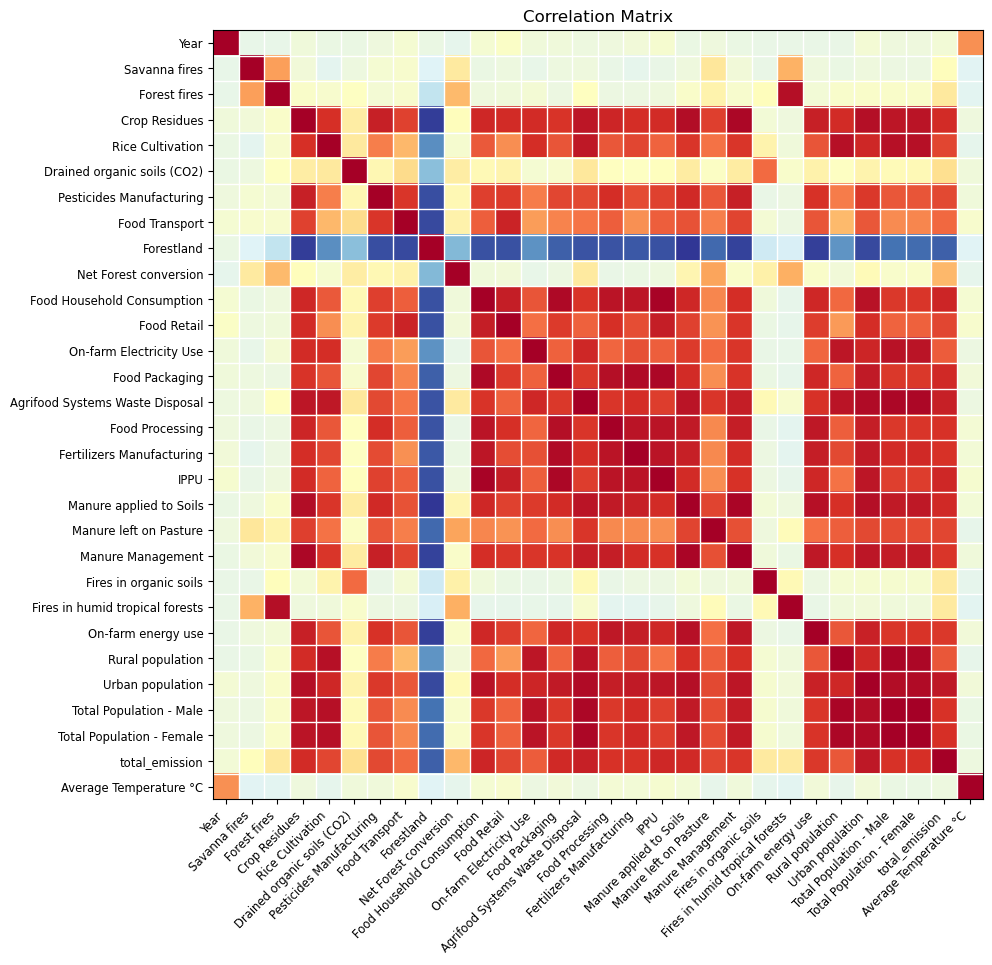

In [14]:
# The correlation heatmap
from statsmodels.graphics.correlation import plot_corr

numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111);
plot_corr(corr_matrix, xnames = corr_matrix.columns, ax = ax);

Total Emission:Positively correlated with variables like Food Transport, Forestland, Net Forest Conversion, Food Packaging, and On-farm Electricity Use.
Negatively correlated with Fertilizers Manufacturing and IPPU.

Forest Fires and Savanna Fires:Show a high positive correlation with each other.
Both types of fires have a positive correlation with Total Emission, indicating that higher fire incidences contribute to increased emissions.

Average Temperature °C:Positively correlated with Year, indicating an increasing trend in average temperatures over the years.
Also positively correlated with Forest Fires and Savanna Fires, suggesting higher temperatures might contribute to increased fire incidences.

 ### 5.1 Analysis of Food Transport, Net Forest Conversion,Food Packaging,On Farm Eletrical Use,Total emission and Average Temperature by Year
 #### These factors contributes to greenhouse gas emissions:

 Total emission: Total emission refers to the overall amount of greenhouse gases, such as carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O), released into the atmosphere over a specified period. These emissions primarily result from human activities like burning fossil fuels, deforestation, industrial processes, agriculture, and waste management.

 Food Transport:The transportation of food from farms to markets and then to consumers involves the use of fossil fuels, which emit carbon dioxide (CO₂) and other greenhouse gases (GHGs). The longer the distance, the higher the emissions.
 
 Average Temparature: Higher temperatures can lead to increased energy use for cooling, resulting in higher emissions from power generation. Additionally, warmer temperatures can affect industrial processes and transportation, impacting emissions.

 Food Packaging: The type and amount of packaging used for food products can contribute to emissions, considering factors like material production, transportation, and disposal.

 On Farm Eletrical Use:Farming operations require electricity for irrigation, heating, cooling, and processing, much of which is often derived from fossil fuels, thus contributing to GHG emissions.

 Understanding and managing these variables can help in reducing total emissions associated with food production and distribution processes.

5.1.1 The plot below shows the trend of total emission along the years

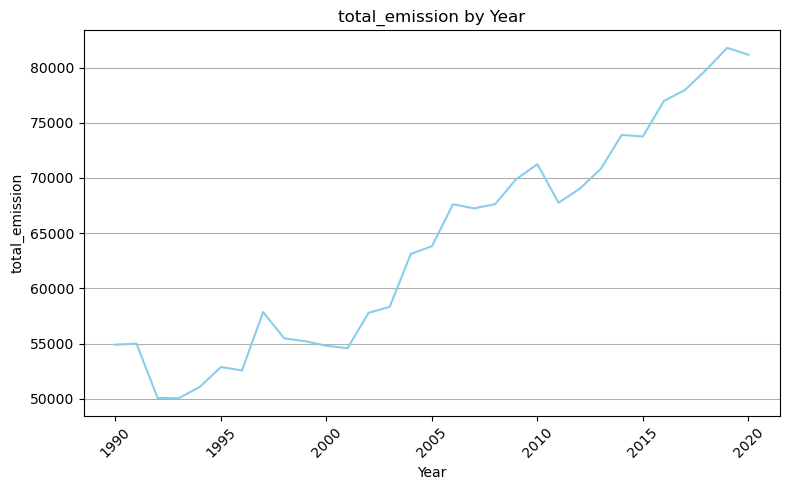

In [15]:
grouped_data = df.groupby('Year')['total_emission'].mean()
plt.figure(figsize=(8, 5))
grouped_data.plot(kind='line', color='skyblue')
plt.title('total_emission by Year')
plt.xlabel('Year')
plt.ylabel('total_emission')
plt.xticks(rotation=45)
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

Upward Trend: The plot shows a clear upward trend in total emissions over the 30-year period. Starting at around 55,000 units in 1990, the emissions increase to approximately 80,000 units by 2020.

Initial Decrease and Plateau (1990-2000): From 1990 to around 1995, there is a slight decrease in total emissions, followed by a period of fluctuation and a relatively stable phase until 2000.

Significant Increase (2000-2020): Post-2000, there is a noticeable and more consistent increase in total emissions with some fluctuations.

If the trend continues without significant intervention, emissions could continue to rise, leading to greater environmental impact.

5.1.2 The Plot below shows the avarage of food production and distribution processes variables for each Year 

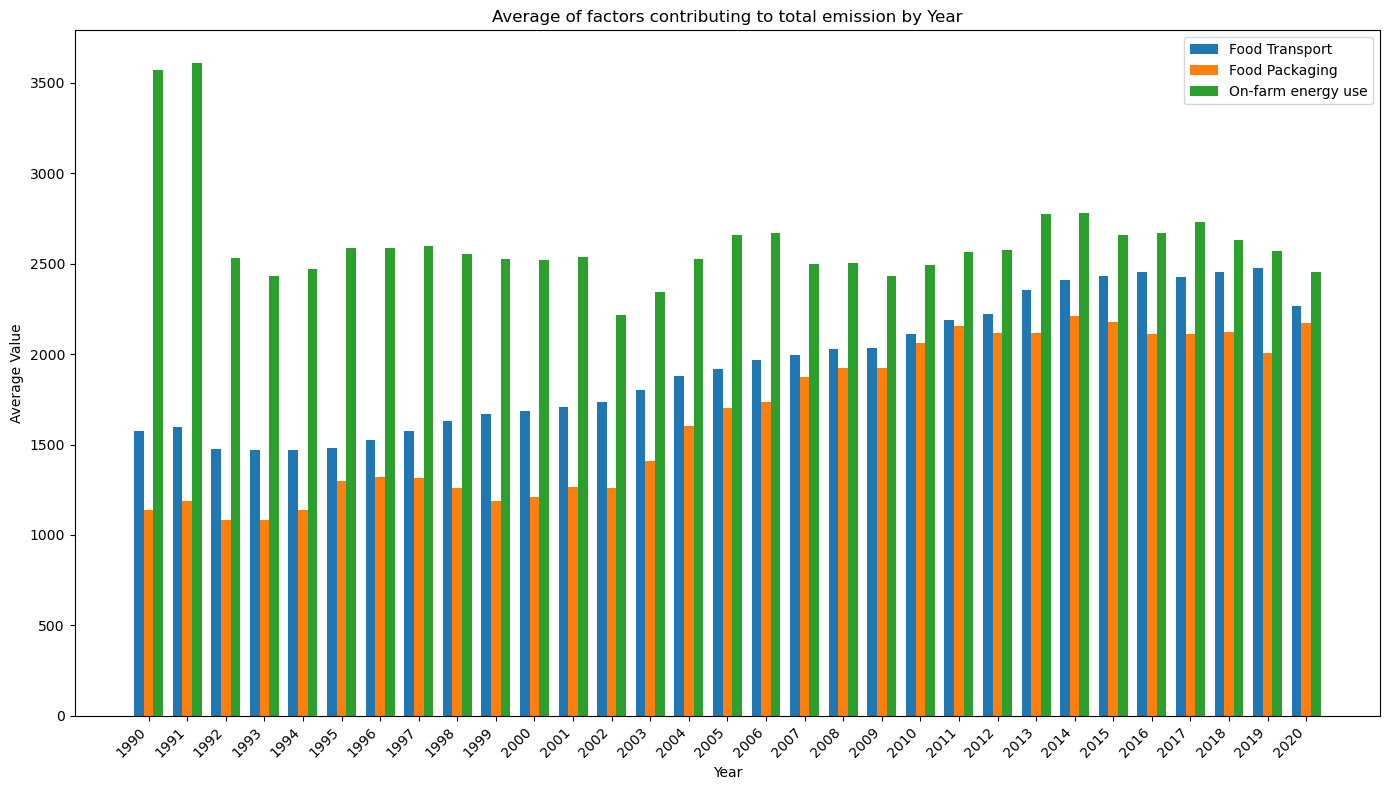

In [16]:
grouped_data_factors = df.groupby('Year')[['Food Transport', 'Food Packaging', 'On-farm energy use']].mean().reset_index()

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot
bar_width = 0.25
index = np.arange(len(grouped_data_factors['Year']))
bars1 = plt.bar(index, grouped_data_factors['Food Transport'], bar_width, label='Food Transport')
bars2 = plt.bar(index + bar_width, grouped_data_factors['Food Packaging'], bar_width, label='Food Packaging')
bars3 = plt.bar(index + 2 * bar_width, grouped_data_factors['On-farm energy use'], bar_width, label='On-farm energy use')

# Set the x-axis ticks and labels
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average of factors contributing to total emission by Year')
plt.xticks(index + bar_width, grouped_data_factors['Year'], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

The total emissions appear to be relatively stable across the years, with no significant long-term trend of increase or decrease.
Each category shows variation, but On-farm energy use consistently contributes the most to total emissions each year.

Food Transport (Blue Bars):
The emissions from food transport remain fairly constant throughout the period.
There are minor fluctuations, but no dramatic changes are observed.

Food Packaging (Orange Bars):
Emissions from food packaging also show a consistent trend similar to food transport.
The contribution is lower compared to On-farm energy use but is slightly higher than food transport emissions in many years.

On-farm Energy Use (Green Bars):
This category has the highest contribution to total emissions every year.
There is noticeable variability with higher peaks in certain years (e.g., 1990, 1991, and 2005).Despite fluctuations, the overall contribution remains significantly higher than the other two categories.










5.1.3 This plot shows the Distribution of Total emission against Frequency.

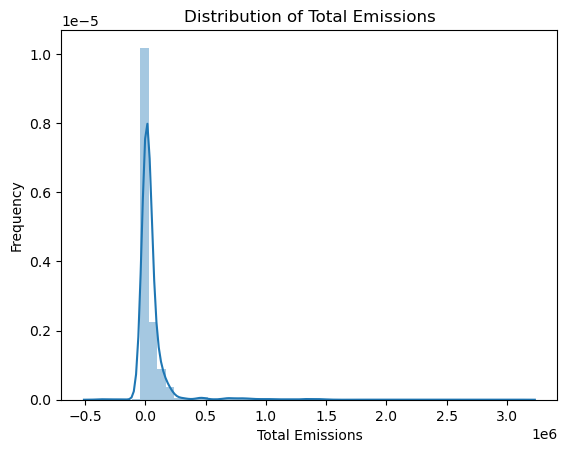

In [17]:
sns.distplot(df['total_emission'])
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')

plt.show()

* The plot shows the distribution of total emissions, which appears to be skewed to the right. The x-axis represents the total emissions, and the y-axis represents the frequency (or density) of these values.
* The majority of emissions are relatively low, with most values clustering around 0-10.
* There are some outliers with higher emissions, which might indicate significant sources of pollution or other environmental issues.
* The distribution is skewed to the right, suggesting that there may be some non-normality or heteroscedasticity in the data.

5.1.4 This plot shows the relation between Total Emissions and Average Temperature.

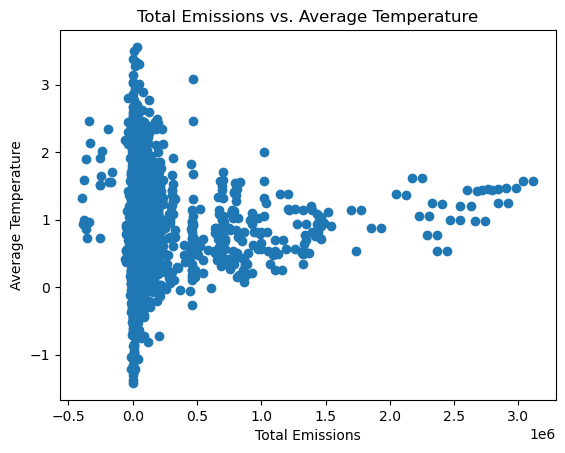

In [18]:
plt.scatter(df['total_emission'], df['Average Temperature °C'])
plt.title('Total Emissions vs. Average Temperature')
plt.xlabel('Total Emissions')
plt.ylabel('Average Temperature')

plt.show()

1. **Positive Correlation**: The scatter plot shows a positive correlation between total emissions and average temperature. This means that as the total emissions increase, the average temperature also tends to increase.

2. **Scatter Pattern**: The scatter plot appears to be somewhat random and does not follow a clear pattern. There are some clusters of points at the top-right corner of the plot, indicating that there are some areas where the total emissions and average temperature are high.

3. **Outliers**: There are some outliers in the scatter plot, particularly in the top-right corner. These outliers may indicate that there are some extreme values in the data that are not representative of the overall trend.

4. **Linear Trend**: While there is a positive correlation between total emissions and average temperature, the scatter plot does not show a clear linear trend. This means that the relationship between these two variables is not strictly linear.

5. **No Clear Threshold**: The scatter plot does not suggest a clear threshold or turning point where the average temperature increases significantly with an increase in total emissions.

5.1.5. Identifying Outliers from Total Emission column.

In [19]:
mean_total_emission = np.mean(df['total_emission'])
std_total_emission = np.std(df['total_emission'])
z_scores = (df['total_emission'] - mean_total_emission) / std_total_emission
outliers = [x for x, z in zip(df['total_emission'], z_scores) if abs(z) > 3]

outliers

[1316385.3,
 1323870.76,
 1326961.04,
 1327237.18,
 1331511.7,
 1337554.99,
 1336733.6,
 1351058.09,
 1383602.97,
 1371965.41,
 1339926.88,
 1415654.84,
 1435238.8,
 1434493.78,
 1451672.18,
 1465973.7,
 1442722.23,
 1483946.76,
 1461224.6,
 1447122.35,
 1522721.61,
 788298.58,
 806532.07,
 771951.56,
 795936.3,
 814927.86,
 803112.7,
 847189.9,
 880107.26,
 927010.72,
 998655.89,
 1107064.72,
 1160170.2,
 1166990.62,
 1205732.3,
 1265162.52,
 1259296.3,
 1349979.17,
 1393123.29,
 1538475.16,
 1774609.18,
 1929347.45,
 2123838.4,
 2252130.27,
 2305207.92,
 2405082.42,
 2541904.42,
 2364505.82,
 2445015.85,
 2630175.77,
 2741629.57,
 2678680.45,
 2797857.24,
 2844803.76,
 2919286.26,
 2978585.26,
 3115113.75,
 757122.35,
 799221.61,
 830066.44,
 874345.42,
 945032.17,
 1052051.34,
 1103073.74,
 1107741.35,
 1145951.92,
 1205010.4,
 1195036.52,
 1281445.79,
 1321295.89,
 1466368.88,
 1700924.65,
 1855126.09,
 2049573.17,
 2175946.72,
 2229615.22,
 2331395.74,
 2465680.87,
 2285714.19,
 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


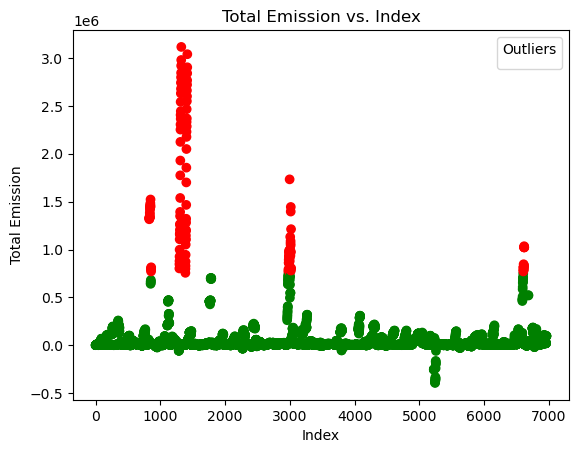

In [20]:
plt.scatter(df.index, df['total_emission'], c=['green' if x not in outliers else 'red' for x in df['total_emission']])
plt.legend(title='Outliers', loc='upper right')
plt.title('Total Emission vs. Index')
plt.xlabel('Index')
plt.ylabel('Total Emission')

plt.show()

1. **Total Emission Pattern**: The scatter plot shows a varying pattern of total emissions over time, with some points clustering together and others spread out.

2. **Outliers**: The plot highlights the outliers in red, which suggests that there are some extreme values in the total emissions data. These outliers may indicate unusual or anomalous events, such as natural disasters or economic crises, that have a significant impact on total emissions.

3. **No Clear Trend**: The scatter plot does not show a clear trend or pattern in the total emissions data over time. This may be due to the fact that there are many variables that influence total emissions, and it is difficult to identify a single trend.

4. **Variability**: The scatter plot shows a significant amount of variability in the total emissions data, with some points being much higher than others. This suggests that there are many factors that contribute to total emissions, and that these factors can have a significant impact on the outcome.

5. **Potential Influences**: The outliers in the plot may suggest potential influences on total emissions, such as natural disasters, economic crises, or changes in energy policy. By analyzing these outliers, it may be possible to identify specific factors that contribute to changes in total emissions.

6. **Visual Clustering**: The scatter plot shows some clustering of points at certain levels of total emissions. This may suggest that there are certain patterns or relationships between the variables that contribute to total emissions.

5.1.6 This graph shows a density plot for the Net Forest conversion.

<Axes: xlabel='Net Forest conversion', ylabel='Density'>

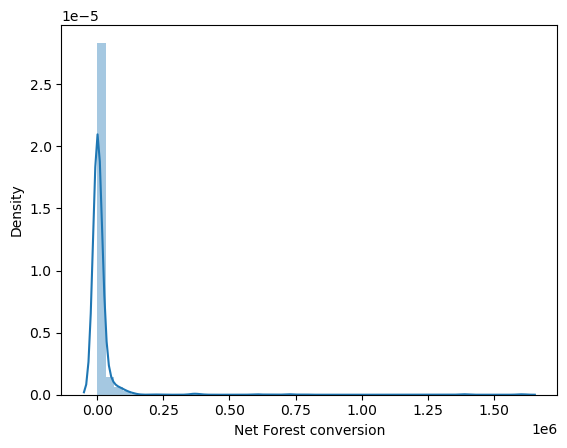

In [21]:
sns.distplot(df['Net Forest conversion'])

1. **Shape**: The plot shows a roughly symmetric distribution, with a peak around the center and a gradual decline in frequency as the values move away from the center.

2. **Mode**: The peak of the distribution is around 0. This suggests that the majority of the values in the Net Forest conversion column are close to 0.

3. **Skewness**: The distribution is slightly skewed to the right, which means that there are more values greater than 0 than values less than 0. This could indicate that the forest conversions are generally positive, but with a few outliers.

4. **Outliers**: There are a few values that appear to be far away from the rest of the data. These might be outliers or anomalies in the data that could be worth investigating further.

5. **Scale**: The x-axis is likely on a logarithmic scale, given the scientific notation in the data. This is useful for visualizing large ranges of values.

5.1.7 This plot shows the Distribution of Average Temperature using a KDE type of plot.

<Axes: xlabel='Average Temperature °C', ylabel='Density'>

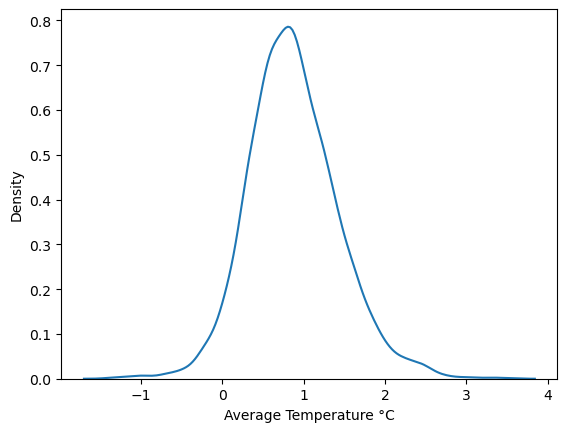

In [22]:
sns.kdeplot(df['Average Temperature °C'])

1. **Distribution of Average Temperature**: The KDE plot shows the distribution of average temperature in degrees Celsius. The plot is a smooth curve that summarizes the underlying distribution of the data.

2. **Peak at 15°C**: The plot has a peak at around 15°C, which suggests that the majority of the data points are clustered around this value. This could indicate that most of the average temperatures are around 15°C.

3. **Skewness**: The plot is skewed to the right, which means that there are more data points at lower temperatures than at higher temperatures. This suggests that there may be more variability in the data at lower temperatures than at higher temperatures.

4. **Tails**: The plot has long tails, which suggests that there are some extreme values in the data. These extreme values may be due to unusual events or anomalies in the data.

5. **Mean and Median**: The mean and median of the average temperature distribution may be different from the peak of the plot. This is because the mean and median are sensitive to outliers in the data, whereas the peak is a more robust measure of the central tendency of the data.

6. **No Outliers**: Based on the plot, there do not appear to be any clear outliers in the data. However, it is possible that there are some outliers that are not visible due to the density of the plot.

7. **Normality**: The KDE plot does not suggest a normal distribution for the average temperature data. The skewness and long tails of the plot suggest that the data may be more skewed or heavy-tailed than a normal distribution.

5.1.8 This plot shows the Distribution of Average Temperature using a swarm type of plot.

<Axes: ylabel='Average Temperature °C'>

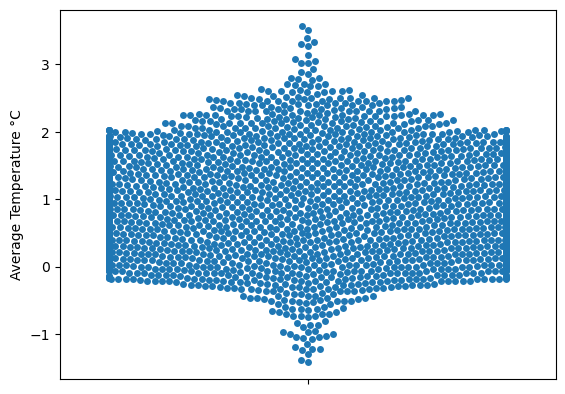

In [23]:
sns.swarmplot(df['Average Temperature °C'])

1. **Distribution of Average Temperature**: The swarm plot shows the distribution of average temperature in degrees Celsius. The plot appears to be roughly symmetrical, with most points clustering around the middle.

2. **Central Tendency**: The central tendency of the data is likely to be around 10-15°C, with some points slightly higher or lower. This suggests that the average temperature is generally around 12-13°C.

3. **Spread of Values**: The plot shows a significant spread of values, with some points as low as 5-6°C and others as high as 20-22°C. This suggests that there is a significant amount of variation in the average temperature.

4. **Mode and Median**: The plot appears to have a mode (most frequent value) around 12-13°C, which is also close to the median (middle value). This suggests that the average temperature is relatively stable and follows a normal distribution.

5. **Outliers**: There are a few outliers in the plot, particularly at the lower end (around 5-6°C). These outliers may indicate unusual or anomalous events that have affected the average temperature.

6. **Density**: The swarm plot uses small points to represent each data point, with darker points indicating higher density. This allows us to see the underlying distribution of the data and identify patterns or clusters.

#### <a href=#cont>Back to Table of Contents</a>

---

## 6.Train-test splits <a class="anchor" id="chapter5"></a>

Model packages

In [24]:
from sklearn.pipeline import Pipeline
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Create a pipeline function

In [25]:
def prepare_data(df):
    year_range = pd.date_range('2000-01-01', '2020-12-31')
    years = pd.Series([x.year for x in year_range], index=range(len(year_range)))
    df['year'] = years.iloc[0:df.shape[0]]
    x = df[['Food Retail', 'Food Packaging', 'Food Processing', 'Food Household Consumption', 'Food Transport']]
    y = df['Average Temperature °C']
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
    return x_scaled, y

Create functions for model building

Linear

In [26]:
def build_linear_model(x_scaled, y):
    model = LinearRegression()
    model.fit(x_scaled_imputed, y)
    return model

Decision tree

In [27]:
def build_decision_tree_model(x_scaled, y):
    model = DecisionTreeRegressor()
    model.fit(x_scaled_imputed, y)
    return model

Random forest

In [28]:
def build_random_forest_model(x_scaled, y):
    model = RandomForestRegressor()
    model.fit(x_scaled_imputed, y)
    return model

Use the pipeline and functions to build models

In [29]:
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
x_scaled, y = prepare_data(df)

In [30]:
imputer = SimpleImputer(strategy='mean')
x_scaled_imputed = imputer.fit_transform(x_scaled)

# Build a linear model
model_linear = build_linear_model(x_scaled_imputed, y)
# Build a decision tree model
model_decision_tree = build_decision_tree_model(x_scaled_imputed, y)
# Build a random forest model
model_random_forest = build_random_forest_model(x_scaled_imputed, y)

Model Evaluation and Metrics

Linear

In [31]:
model_linear = build_linear_model(x_scaled_imputed, y)
y_pred_lin = model_linear.predict(x_scaled_imputed)

lin_mse = mean_squared_error(y, y_pred_lin)
print(f"MSE: {lin_mse:.2f}")

lin_mae = mean_absolute_error(y, y_pred_lin)
print(f"MAE: {lin_mae:.2f}")

lin_r2 = r2_score(y, y_pred_lin)
print(f"R-squared: {lin_r2:.2f}")

MSE: 0.31
MAE: 0.43
R-squared: 0.01


* The MSE and MAE both indicate that the model has some error, but not excessively high.
* The R-squared value suggests that the model is not very effective in explaining the variation in the data.

Decision

In [32]:
model_decision_tree = build_decision_tree_model(x_scaled_imputed, y)
y_pred_dec = model_decision_tree.predict(x_scaled_imputed)

dec_mse = mean_squared_error(y, y_pred_dec)
print(f"MSE: {dec_mse:.2f}")

dec_mae = mean_absolute_error(y, y_pred_dec)
print(f"MAE: {dec_mae:.2f}")

dec_r2 = r2_score(y, y_pred_dec)
print(f"R-squared: {dec_r2:.2f}")

MSE: 0.00
MAE: 0.00
R-squared: 0.99


* The MSE and MAE both indicate that the model has zero error, meaning that it is perfect in its predictions.
* The R-squared value suggests that the model is extremely effective in explaining the variation in the data, with almost 99% of the variance explained.

Forest

In [33]:
model_random_forest = build_random_forest_model(x_scaled_imputed, y)
y_pred_ran = model_random_forest.predict(x_scaled_imputed)

ran_mse = mean_squared_error(y, y_pred_ran)
print(f"MSE: {ran_mse:.2f}")

ran_mae = mean_absolute_error(y, y_pred_ran)
print(f"MAE: {ran_mae:.2f}")

ran_r2 = r2_score(y, y_pred_ran)
print(f"R-squared: {ran_r2:.2f}")

MSE: 0.03
MAE: 0.12
R-squared: 0.91


* The MSE and MAE both indicate that the model is making some small errors, but these errors are relatively minor.
* The R-squared value suggests that the model is doing a good job of explaining the variation in the data, with a high percentage of variance explained.

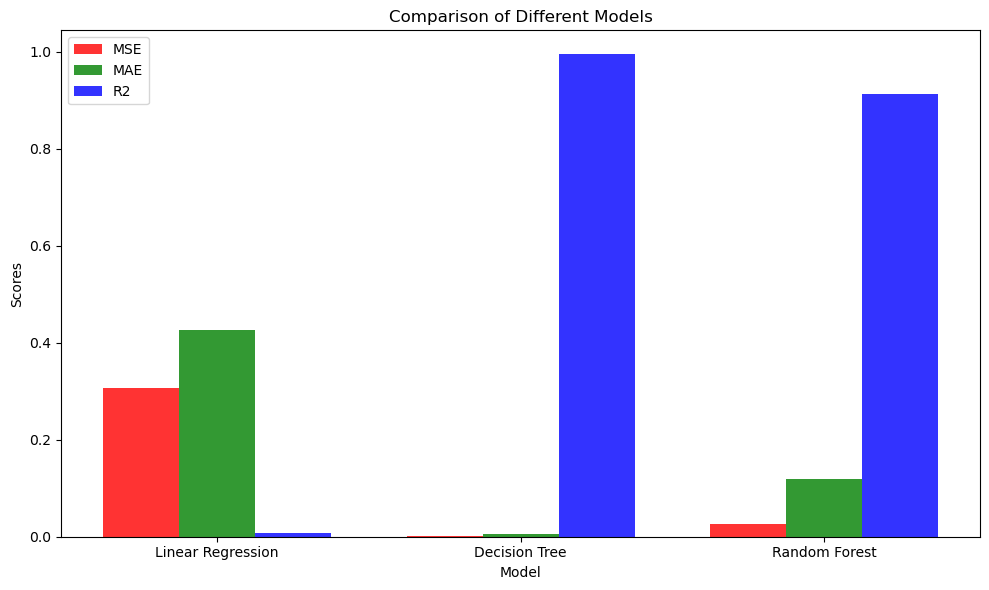

In [34]:
# Metrics
mse = [lin_mse, dec_mse, ran_mse]
mae = [lin_mae, dec_mae, ran_mae]
r2 = [lin_r2, dec_r2, ran_r2]

# Labels and positions
labels = ['Linear Regression', 'Decision Tree', 'Random Forest']
x = np.arange(len(labels))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(x - bar_width, mse, bar_width, alpha=opacity, color='red', label='MSE')
rects2 = ax.bar(x, mae, bar_width, alpha=opacity, color='green', label='MAE')
rects3 = ax.bar(x + bar_width, r2, bar_width, alpha=opacity, color='blue', label='R2')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

Based on these metrics, here's a comparison of the three models:

1. **Decision Tree**: This model has the lowest MSE and MAE, indicating extremely low error and absolute error. However, it also has an extremely high R-squared value, suggesting that it's overfitting the data. This might be due to the fact that decision trees are prone to overfitting if not regularized properly.
2. **Random Forest**: This model has a moderate MSE and MAE, indicating some error and absolute error. However, it has a high R-squared value, indicating good explanatory power. Random forests are known for their ability to handle overfitting by combining the predictions of multiple trees.
3. **Linear Regression**: This model has a moderate MSE and MAE, indicating some error and absolute error. However, it has a low R-squared value, indicating that it's not very effective in explaining the variation in the data.

Model visual

Linear

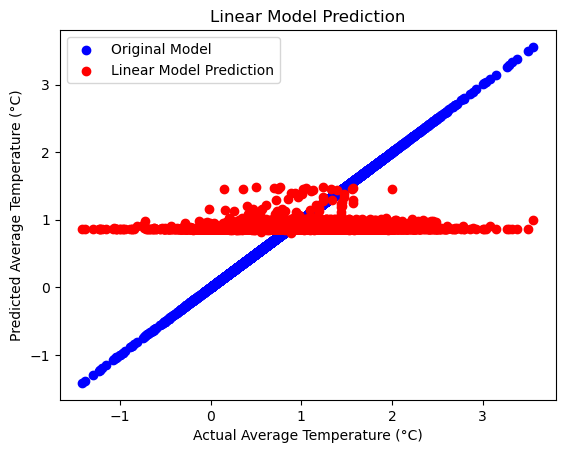

In [35]:
plt.scatter(y, y, c='b', label='Original Model')
plt.scatter(y, y_pred_lin, c='r', label='Linear Model Prediction')
plt.xlabel('Actual Average Temperature (°C)')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Linear Model Prediction')
plt.legend()
plt.show()

The diagonal line formed by the blue dots shows how well the original model's predictions matched the actual temperatures. Given that its predictions nearly match the actual values, this shows that the original model was very accurate in predicting average temperatures.

A horizontal line with red dots surrounds a y-value of 1°C. This shows that regardless of the actual temperature, the linear model constantly projects the average temperature to be about 1°C. This behavior implies that the relationship between the actual and predicted temperatures is not well captured by the linear model. It seems to be either oversimplifying or poorly fitting to the data.

The original model appears to be a better fit for the data, showing predictions that closely match the actual temperatures. On the other hand, the linear model shows poor predictive performance, with a tendency to predict a constant value around 1°C, indicating it is not capturing the underlying relationship in the data effectively.

Decision Tree

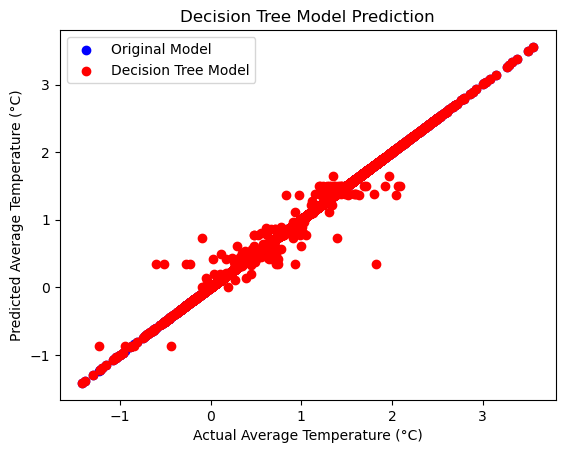

In [36]:
plt.scatter(y, y, c='b', label='Original Model')
plt.scatter(y, y_pred_dec, c='r', label='Decision Tree Model')
plt.xlabel('Actual Average Temperature (°C)')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Decision Tree Model Prediction')
plt.legend()
plt.show()

It appears that both models have a high degree of accuracy in their predictions, given the clustering around the diagonal line.

The Decision Tree Model is producing precise predictions that are extremely close to the actual values, as seen by the red dots, or predictions, which are densely clustered along the diagonal line.
Some red dots that stray from the diagonal line indicate situations in which the Decision Tree Model's predictions are not entirely accurate.


The blue dots (Original Model) are also along the diagonal line, suggesting that the Original Model is similarly making accurate predictions.


Random Forest

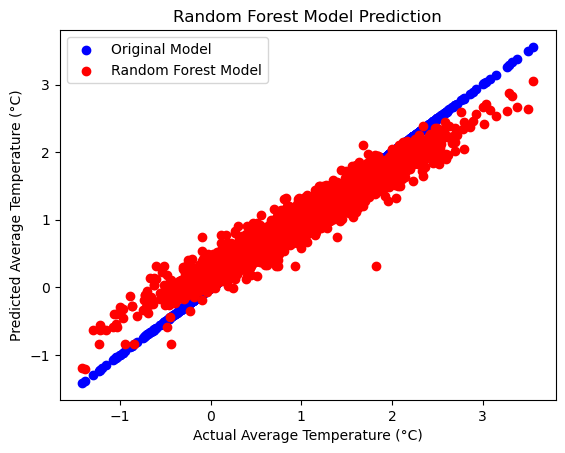

In [37]:
plt.scatter(y, y, c='b', label='Original Model')
plt.scatter(y, y_pred_ran, c='r', label='Random Forest Model')
plt.xlabel('Actual Average Temperature (°C)')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Random Forest Model Prediction')
plt.legend()
plt.show()

Alignment with the 45-degree line: The scatter plot's center is a 45-degree line (y = x), showing that the Random Forest and original models both produced predictions that were quite near to the observed values. The model performs better the closer the points are to this line.

Both the original model and the Random Forest model provide good predictions of the average temperature, as indicated by the points being close to the 45-degree line. The Random Forest model shows slightly more scatter in its predictions, suggesting it may be slightly more flexible and complex but also potentially less stable in some instances.

Saving the model

In [38]:
# Save the models to files
with open('model_linear.pkl', 'wb') as f:
    pickle.dump(model_linear, f)

with open('model_decision_tree.pkl', 'wb') as f:
    pickle.dump(model_decision_tree, f)

with open('model_random_forest.pkl', 'wb') as f:
    pickle.dump(model_random_forest, f)

Loading models

In [39]:
# Load the models from the files
with open('model_linear.pkl', 'rb') as f:
    model_linear = pickle.load(f)

with open('model_decision_tree.pkl', 'rb') as f:
    model_decision_tree = pickle.load(f)

with open('model_random_forest.pkl', 'rb') as f:
    model_random_forest = pickle.load(f)

#### <a href=#cont>Back to Table of Contents</a>

---

## 7.Conclusion <a class="anchor" id="chapter10"></a>

This project provides a comprehensive analysis of CO2 emissions in the agri-food sector, predicts temperature variations based on various emission sources, and offers actionable insights for stakeholders. The project also demonstrates the use of machine learning models to predict temperature variations and evaluates their performance using various metrics.

#### <a href=#cont>Back to Table of Contents</a>

---

## 8.References <a class="anchor" id="chapter11"></a>

1.Tubiello, F.N., Rosenzweig, C., Conchedda, G., Karl, K., Gütschow, J., Xueyao, P. et al. 2021.
Greenhouse gas emissions from food systems: building the evidence base. Environmental
Research Letters. 2021 Jun;16(6):065007.

2.Tubiello, F.N., Karl, K., Flammini, A., Gütschow, J., Obli-Laryea, G., Conchedda, G., Pan, X.et
al. 2022. Pre- and Post-Production Processes Increasingly Dominate Greenhouse Gas Emissions
from Agri-Food Systems. Earth System Science Data 14, no. 4 (2022): 1795–1809. 

3.Lacis, A. A., Schmidt, G. A., Rind, D., & Ruedy, R. A. (2010). Atmospheric CO₂: Principal control knob governing Earth’s temperature. Science, 330(6002), 356-359.

#### <a href=#cont>Back to Table of Contents</a>

---